In [1]:
import numpy as np
import pandas as pd
import statsmodels.tsa as tsa
from statsmodels.tsa.vector_ar.var_model import VAR, FEVD
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf, kpss
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#import mvts_utils as utils
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

# Load in the data

In [4]:
import h5py
file_name = '../../data/jid_playground/jid_eeg.h5'

In [5]:
df1 = pd.DataFrame(np.array(h5py.File(file_name)['bin1530']))
df1 = df1.dropna()

In [8]:
df1.head(10)

0         1         2         3          4         5         6   \
0 -5.010096 -7.471970 -5.222030 -0.070401   0.723151 -2.652430 -6.562227   
1 -4.491299 -6.828745 -4.413321  1.044307   1.789987 -1.629328 -6.489788   
2 -3.945387 -6.167099 -3.631674  2.148291   2.862839 -0.559727 -6.425260   
3 -3.355640 -5.470657 -2.871424  3.237437   3.942619  0.561986 -6.343477   
4 -2.704514 -4.721220 -2.124459  4.308027   5.028917  1.739042 -6.215683   
5 -1.979359 -3.903050 -1.381531  5.358114   6.121176  2.970496 -6.015847   
6 -1.176286 -3.005726 -0.634780  6.384256   7.215928  4.248088 -5.724364   
7 -0.294545 -2.020450  0.124808  7.384039   8.308808  5.560336 -5.324624   
8  0.660938 -0.943785  0.904615  8.354674   9.393373  6.890951 -4.807120   
9  1.678143  0.220552  1.707091  9.288980  10.457879  8.217284 -4.168167   

          7          8          9         10         11         12         13  \
0 -11.239132 -13.338441 -10.478822 -8.695134   3.495069   7.402113   5.610150   
1 -11.633616 -13.809785 -10.251541 -8.019357   4.351437   8.323714   6.676959   
2 -12.033147 -14.298256 -10.038291 -7.347164   5.181018   9.180624   7.666557   
3 -12.396767 -14.769664  -9.825912 -6.675950   5.980307   9.970985   8.580307   
4 -12.678290 -15.184535  -9.597308 -6.001185   6.745623  10.693322   9.420053   
5 -12.833339 -15.504816  -9.334839 -5.315282   7.477230  11.350522  10.191045   
6 -12.824555 -15.694895  -9.019820 -4.609226   8.176850  11.947125  10.900816   
7 -12.619161 -15.721168  -8.632700 -3.872552   8.847152  12.489448  11.558286   
8 -12.194385 -15.558471  -8.158363 -3.096441   9.490488  12.983164  12.172211   
9 -11.535251 -15.186763  -7.584366 -2.275193  10.105872  13.429571  12.747585   

          14         15         16        17        18         19         20  \
0   7.682362   2.485868  -2.847615 -9.870010 -8.441239 -12.492434 -16.769333   
1   8.787175   3.643477  -1.524850 -9.004733 -8.646618 -12.731614 -17.495449   
2   9.830449   4.817129  -0.130689 -8.081794 -8.863778 -12.939323 -18.225274   
3  10.814612   6.006771   1.331187 -7.093182 -9.069839 -13.093216 -18.926548   
4  11.741548   7.209866   2.854163 -6.031040 -9.237110 -13.167007 -19.558290   
5  12.614622   8.420755   4.426396 -4.892204 -9.339246 -13.135407 -20.078458   
6  13.437915   9.631022   6.029806 -3.679679 -9.354583 -12.978831 -20.447438   
7  14.215120  10.830460   7.644096 -2.399523 -9.263743 -12.680997 -20.628277   
8  14.948042  12.003729   9.244208 -1.063413 -9.053688 -12.231839 -20.593770   
9  15.635892  13.131829  10.799755  0.312152 -8.715250 -11.625173 -20.319088   

          21         22        23         24         25         26         27  \
0 -14.252149 -11.520980 -2.269031   6.028826  11.187862  10.847127   8.542318   
1 -14.781206 -11.599127 -1.990260   6.665788  12.272936  11.491616   9.116556   
2 -15.277497 -11.662260 -1.688631   7.299426  13.270698  12.043616   9.599265   
3 -15.724147 -11.701066 -1.361265   7.928347  14.167076  12.508096  10.004250   
4 -16.100842 -11.704092 -1.007260   8.548128  14.946810  12.888419  10.344194   
5 -16.390047 -11.660011 -0.624433   9.157818  15.602564  13.193525  10.635074   
6 -16.573302 -11.555635 -0.209585   9.756241  16.131457  13.436385  10.894932   
7 -16.633800 -11.377734  0.239730  10.341336  16.534423  13.630192  11.139545   
8 -16.561985 -11.118203  0.722555  10.910437  16.816401  13.789203  11.384882   
9 -16.347108 -10.768761  1.235476  11.456070  16.978992  13.922821  11.642964   

          28         29         30        31        32         33         34  \
0   9.179890   7.927500   3.597815 -5.730086 -7.406996 -13.348417 -17.855223   
1   9.938976   8.876236   4.718466 -4.284939 -6.612558 -13.373885 -18.224488   
2  10.595039   9.776884   5.818368 -2.813693 -5.796369 -13.360626 -18.520466   
3  11.158798  10.629149   6.889274 -1.331616 -4.957900 -13.302070 -18.736800   
4  11.641419  11.432998   7.923862  0.148263 -4.093903 -13.187480 -18.859674   
5  12.055954  12.187787   8

In [10]:
df1.T.iloc[0].head(10)

0   -5.010096
1   -4.491299
2   -3.945387
3   -3.355640
4   -2.704514
5   -1.979359
6   -1.176286
7   -0.294545
8    0.660938
9    1.678143
Name: 0, dtype: float64

# Explore data

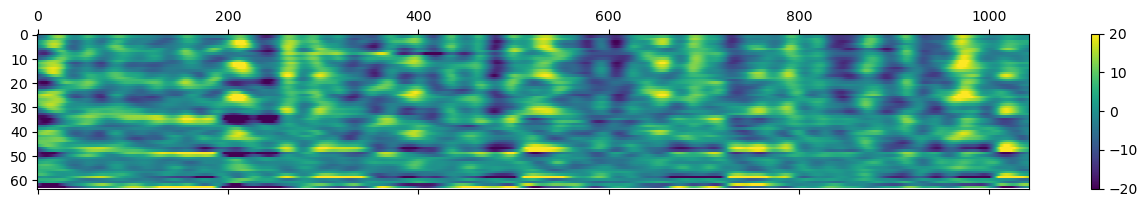

In [32]:
#ax = plt.gca()
im = plt.matshow(df1.T,aspect ='auto', vmin=-20, vmax=20)
plt.colorbar()
plt.show()

In [ ]:
data_df = df1
fig,ax = plt.subplots(16,4, figsize=(15,15), sharex=True)
data_df.plot(ax=ax, subplots=True)
plt.show()

# Check if the variables are correlated at different time lags

In [102]:
ccf(df1.T.iloc[0],df1.T.iloc[1], unbiased=False)

array([9.20883201e-01, 9.10660597e-01, 8.89619415e-01, ...,
       8.79382129e-04, 6.44583438e-04, 3.50950558e-04])

In [104]:
len(df1.T.iloc[0])

1043

<IPython.core.display.Javascript object>


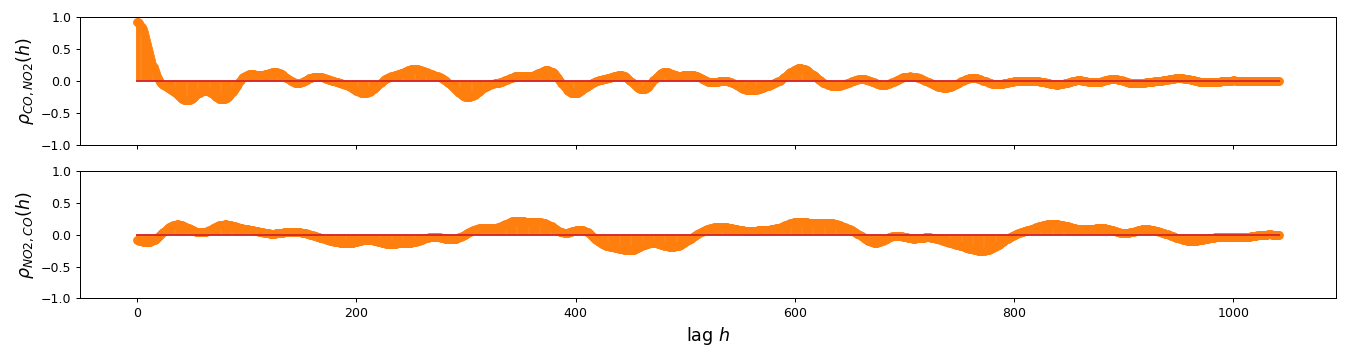

In [14]:
ccf_y1_y2 = ccf(df1.T.iloc[2],df1.T.iloc[1], unbiased=False)
ccf_y2_y1 = ccf(df1.T.iloc[0],df1.T.iloc[63], unbiased=False)
fig, ax = plt.subplots(2, figsize=(15, 4), sharex=True, sharey=True)
d=1
ax[0].stem(np.arange(len(df1.T.iloc[0]))[::d], ccf_y1_y2[::d], linefmt='C1-', markerfmt='C1o')
ax[1].stem(np.arange(len(df1.T.iloc[0]))[::d], ccf_y2_y1[::d], linefmt='C1-', markerfmt='C1o')
ax[-1].set_ylim(-1, 1)
ax[-1].set_xlabel('lag $h$', fontsize=14)
ax[0].set_ylabel(r'$\rho_{CO,NO2} (h)$', fontsize=14)
ax[1].set_ylabel(r'$\rho_{NO2,CO} (h)$', fontsize=14)
plt.tight_layout()
plt.show()

# Test for stationarity

### KPSS test

In [16]:
test_stat, p_val = [], []
cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
for c in data_df.columns: 
    kpss_res = kpss(data_df[c].dropna(), regression='ct')
    test_stat.append(kpss_res[0])
    p_val.append(kpss_res[1])
    cv_1pct.append(kpss_res[3]['1%'])
    cv_2p5pct.append(kpss_res[3]['1%'])
    cv_5pct.append(kpss_res[3]['5%'])
    cv_10pct.append(kpss_res[3]['10%'])
kpss_res_df = pd.DataFrame({'Test statistic': test_stat, 
                           'p-value': p_val, 
                           'Critical value - 1%': cv_1pct,
                           'Critical value - 2.5%': cv_2p5pct,
                           'Critical value - 5%': cv_5pct,
                           'Critical value - 10%': cv_10pct}, 
                         index=data_df.columns).T
kpss_res_df.round(4)

0       1       2       3       4       5       6   \
Test statistic         0.0474  0.0421  0.0367  0.0674  0.0662  0.0697  0.0677   
p-value                0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.1190  0.1190  0.1190   

                           7       8       9       10      11      12      13  \
Test statistic         0.0402  0.0827  0.0298  0.0429  0.0664  0.0742  0.0573   
p-value                0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.1190  0.1190  0.1190   

                           14      15      16      17      18      19      20  \
Test statistic         0.0964  0.0685  0.0993  0.0755  0.0654  0.0644  0.0528   
p-value                0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.1190  0.1190  0.1190   

                          21      22      23      24      25      26     27  \
Test statistic         0.037  0.0345  0.0465  0.0586  0.0735  0.0862  0.070   
p-value                0.100  0.1000  0.1000  0.1000  0.1000  0.1000  0.100   
Critical value - 1%    0.216  0.2160  0.2160  0.2160  0.2160  0.2160  0.216   
Critical value - 2.5%  0.216  0.2160  0.2160  0.2160  0.2160  0.2160  0.216   
Critical value - 5%    0.146  0.1460  0.1460  0.1460  0.1460  0.1460  0.146   
Critical value - 10%   0.119  0.1190  0.1190  0.1190  0.1190  0.1190  0.119   

                           28      29      30      31      32      33      34  \
Test statistic         0.0522  0.0938  0.0792  0.0797  0.0732  0.0691  0.0953   
p-value                0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.1190  0.1190  0.1190   

                           35      36      37      38      39      40      41  \
Test statistic         0.0651  0.0576  0.0538  0.0339  0.0518  0.0729  0.0798   
p-value                0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.1190  0.1190  0.1190   

                           42      43      44      45      46      47      48  \
Test statistic         0.0686  0.0686  0.1002  0.0786  0.0818  0.0654  0.0629   
p-value                0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000   
Critical value - 1%    0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 2.5%  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160  0.2160   
Critical value - 5%    0.1460  0.1460  0.1460  0.1460  0.1460  0.1460  0.1460   
Critical value - 10%   0.1190  0.1190  0.1190  0.1190  0.1190  0.1190  0.1190   

                           49      50      51      52      53    

### Dickey fuller test

In [17]:
test_stat, p_val = [], []
cv_1pct, cv_5pct, cv_10pct = [], [], []
for c in data_df.columns: 
    adf_res = adfuller(data_df[c].dropna())
    test_stat.append(adf_res[0])
    p_val.append(adf_res[1])
    cv_1pct.append(adf_res[4]['1%'])
    cv_5pct.append(adf_res[4]['5%'])
    cv_10pct.append(adf_res[4]['10%'])
adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                           'p-value': p_val, 
                           'Critical value - 1%': cv_1pct,
                           'Critical value - 5%': cv_5pct,
                           'Critical value - 10%': cv_10pct}, 
                         index=data_df.columns).T
adf_res_df.round(4)

0       1       2       3       4       5       6   \
Test statistic       -2.8888 -3.0319 -3.0737 -2.6666 -2.5899 -2.8863 -2.6621   
p-value               0.0467  0.0320  0.0286  0.0800  0.0951  0.0470  0.0808   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          7       8       9       10      11      12      13  \
Test statistic       -2.9819 -2.4216 -3.2581 -3.0351 -2.9674 -2.4862 -2.6122   
p-value               0.0366  0.1357  0.0169  0.0317  0.0381  0.1189  0.0905   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          14      15      16      17      18      19      20  \
Test statistic       -2.4108 -2.8126 -2.5449 -2.6887 -2.6766 -2.8686 -2.8216   
p-value               0.1387  0.0565  0.1049  0.0760  0.0782  0.0491  0.0553   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          21      22      23      24      25      26      27  \
Test statistic       -3.0474 -3.3692 -3.1374 -3.1774 -3.0204 -2.6545 -2.9680   
p-value               0.0307  0.0121  0.0239  0.0213  0.0330  0.0823  0.0380   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          28      29      30      31      32      33      34  \
Test statistic       -2.8842 -2.8174 -2.5583 -2.7128 -2.6990 -2.7152 -2.2994   
p-value               0.0472  0.0558  0.1019  0.0718  0.0742  0.0714  0.1722   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          35      36      37      38      39      40      41  \
Test statistic       -2.2830 -2.3263 -2.7276 -3.2796 -4.5119 -4.5220 -4.0063   
p-value               0.1775  0.1636  0.0694  0.0158  0.0002  0.0002  0.0014   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          42      43      44      45      46      47      48  \
Test statistic       -3.8420 -3.5611 -3.8287 -2.6029 -2.4459 -2.5317 -2.7591   
p-value               0.0025  0.0065  0.0026  0.0924  0.1292  0.1079  0.0644   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          49      50      51      52      53      54      55  \
Test statistic       -2.2731 -2.4920 -3.2074 -4.4186 -4.6610 -4.3777 -3.9718   
p-value               0.1808  0.1174  0.0196  0.0003  0.0001  0.0003  0.0016   
Critical value - 1%  -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368 -3.4368   
Critical value - 5%  -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644 -2.8644   
Critical value - 10% -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683 -2.5683   

                          56      57      58      59      60      61      62  \
Test statistic       -4.0095 -3.2074 -2.4549 -2.3162 -3.9973 -4.5119 -2.5296   
p-value           

In [53]:
stationary = adf_res_df.T['p-value'] < 0.05

array([ True,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False])

In [11]:
data_df = data_df.T[stationary.values]
data_df.T.head(10)

NameError: name 'stationary' is not defined

# Split data in train and test sets

In [81]:
forecast_length = 100 
train_df, test_df = data_df.iloc[:,0:-forecast_length], data_df.iloc[:,-forecast_length:]

In [82]:
test_df.shape

(32, 100)

<IPython.core.display.Javascript object>


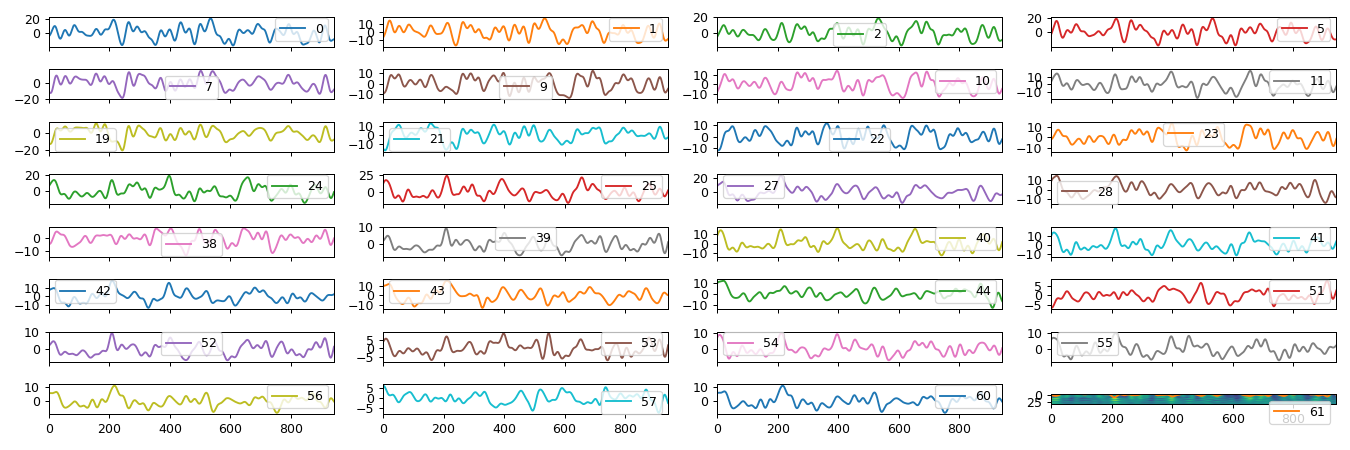

In [99]:
fig,ax = plt.subplots(8,4, figsize=(15, 5), sharex=True)
train_df.T.plot(ax=ax, subplots=True)
plt.xlabel('')
plt.tight_layout()
plt.show()

# Find the best number of lags

In [104]:
model = VAR(train_df.T) 

In [141]:
train_df

0          1          2          3          4          5    \
0   -5.010096  -4.491299  -3.945387  -3.355640  -2.704514  -1.979359   
1   -7.471970  -6.828745  -6.167099  -5.470657  -4.721220  -3.903050   
2   -5.222030  -4.413321  -3.631674  -2.871424  -2.124459  -1.381531   
5   -2.652430  -1.629328  -0.559727   0.561986   1.739042   2.970496   
7  -11.239132 -11.633616 -12.033147 -12.396767 -12.678290 -12.833339   
9  -10.478822 -10.251541 -10.038291  -9.825912  -9.597308  -9.334839   
10  -8.695134  -8.019357  -7.347164  -6.675950  -6.001185  -5.315282   
11   3.495069   4.351437   5.181018   5.980307   6.745623   7.477230   
19 -12.492434 -12.731614 -12.939323 -13.093216 -13.167007 -13.135407   
21 -14.252149 -14.781206 -15.277497 -15.724147 -16.100842 -16.390047   
22 -11.520980 -11.599127 -11.662260 -11.701066 -11.704092 -11.660011   
23  -2.269031  -1.990260  -1.688631  -1.361265  -1.007260  -0.624433   
24   6.028826   6.665788   7.299426   7.928347   8.548128   9.157818   
25  11.187862  12.272936  13.270698  14.167076  14.946810  15.602564   
27   8.542318   9.116556   9.599265  10.004250  10.344194  10.635074   
28   9.179890   9.938976  10.595039  11.158798  11.641419  12.055954   
38  -4.496713  -4.609322  -4.653344  -4.623788  -4.516792  -4.329565   
39   1.828125   1.967846   2.142533   2.348230   2.578706   2.831385   
40   7.993218   8.814011   9.624267  10.407728  11.143586  11.820608   
41   9.817261  10.622403  11.350088  11.989014  12.523570  12.948464   
42   6.451142   6.825346   7.151344   7.436687   7.680506   7.888340   
43   8.817136   9.168784   9.443386   9.653725   9.810357   9.925292   
44   9.405194   9.848298  10.199266  10.469426  10.668868  10.810685   
51  -6.330503  -6.378485  -6.367626  -6.298041  -6.170867  -5.988981   
52   1.989184   2.106721   2.256020   2.433225   2.632321   2.850962   
53   3.820010   4.108256   4.412998   4.719835   5.008596   5.275367   
54   7.028954   7.439434   7.817303   8.158213   8.445895   8.674905   
55   5.995666   6.300874   6.559119   6.774764   6.938065   7.051445   
56   5.653932   5.761249   5.836583   5.885463   5.907337   5.906944   
57   6.330503   6.378485   6.367626   6.298041   6.170867   5.988981   
60   5.420872   5.544762   5.637582   5.703703   5.742066   5.756660   
61   1.802149   1.947830   2.129559   2.342007   2.577734   2.832658   

          6          7          8          9          10         11   \
0   -1.176286  -0.294545   0.660938   1.678143   2.741336   3.828247   
1   -3.005726  -2.020450  -0.943785   0.220552   1.465395   2.777895   
2   -0.634780   0.124808   0.904615   1.707091   2.533817   3.384647   
5    4.248088   5.560336   6.890951   8.217284   9.514476  10.754524   
7  -12.824555 -12.619161 -12.194385 -11.535251 -10.633823  -9.496576   
9   -9.019820  -8.632700  -8.158363  -7.584366  -6.899363  -6.097863   
10  -4.609226  -3.872552  -3.096441  -2.275193  -1.402285  -0.473048   
11   8.176850   8.847152   9.490488  10.105872  10.693982  11.256679   
19 -12.978831 -12.680997 -12.231839 -11.625173 -10.858779  -9.939599   
21 -16.573302 -16.633800 -16.561985 -16.347108 -15.980816 -15.463206   
22 -11.555635 -11.377734 -11.118203 -10.768761 -10.320790  -9.771576   
23  -0.209585   0.239730   0.722555   1.235476   1.776898   2.344288   
24   9.756241  10.341336  10.910437  11.456070  11.972491  12.457054   
25  16.131457  16.534423  16.816401  16.978992  17.028379  16.977131   
27  10.894932  11.139545  11.384882  11.642964  11.921630  12.227957   
28  12.416471  12.736574  13.028674  13.302048  13.563865  13.819985   
38  -4.061638  -3.713852  -3.291013  -2.799717  -2.246055  -1.639426   
39   3.098361   3.370612   3.644961   3.912252   4.163043   4.394890   
40  12.425717  12.949955  13.389959  13.731720  13.970027  14.112111   
41  13.263391  13.470120  13.579245  13.595225  13.524654  13.385667   
42   8.071754   8.231253   8.377015   8.519656   8.656454   8.792879   
43  10.012224  10.081997  10.147690  10.219382  1

<IPython.core.display.Javascript object>


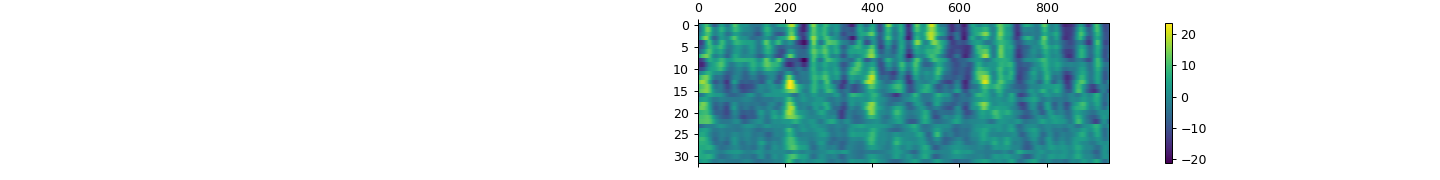

In [123]:
#ax = plt.gca()
im = plt.matshow(train_df,aspect = 10)
plt.colorbar(im)
plt.show()

In [169]:
train_df.shape

(32, 943)

In [221]:
test = train_df.loc[1,16,29]

KeyError: '[16, 29] not in index'

In [217]:
test

0          1          2          3          4          5    \
1  -7.471970  -6.828745  -6.167099  -5.470657  -4.721220  -3.903050   
2  -5.222030  -4.413321  -3.631674  -2.871424  -2.124459  -1.381531   
5  -2.652430  -1.629328  -0.559727   0.561986   1.739042   2.970496   
7 -11.239132 -11.633616 -12.033147 -12.396767 -12.678290 -12.833339   

         6          7          8          9          10         11   \
1  -3.005726  -2.020450  -0.943785   0.220552   1.465395   2.777895   
2  -0.634780   0.124808   0.904615   1.707091   2.533817   3.384647   
5   4.248088   5.560336   6.890951   8.217284   9.514476  10.754524   
7 -12.824555 -12.619161 -12.194385 -11.535251 -10.633823  -9.496576   

         12         13         14         15         16         17   \
1   4.138580   5.521085   6.893121   8.223378   9.479847  10.626875   
2   4.252874   5.125370   5.985994   6.818158   7.602910   8.317852   
5  11.907190  12.941034  13.823011  14.525323  15.024276  15.296520   
7  -8.140041  -6.592425  -4.895120  -3.090515  -1.227389   0.635440   

         18         19         20         21         22         23   \
1  11.630898  12.460184  13.086086  13.488412  13.653000  13.572576   
2   8.939911   9.446635   9.817908  10.036662  10.089505   9.970594   
5  15.326352  15.103917  14.623030  13.888906  12.914552  11.717809   
7   2.442646   4.138786   5.666865   6.980043   8.040272   8.817329   

         24         25         26         27        28        29        30   \
1  13.249403  12.693242  11.923230  10.966616  9.854922  8.626641  7.326978   
2   9.679365   9.218927   8.601735   7.846610  6.975140  6.016305  5.003976   
5  10.326210   8.773514   7.097880   5.342645  3.552403  1.773047  0.051867   
7   9.292756   9.459523   9.324189   8.905388  8.230733  7.338257  6.276070   

        31        32        33        34        35        36        37   \
1  6.002984  4.700324  3.461665  2.327357  1.335564  0.520040 -0.094358   
2  3.972714  2.958218  1.994659  1.113701  0.345139 -0.285578 -0.759602   
5 -1.566103 -3.040595 -4.337497 -5.428090 -6.288577 -6.901847 -7.260608   
7  5.099940  3.866846  2.631230  1.447774  0.369371 -0.554488 -1.281369   

        38        39        40        41        42        43        44   \
1 -0.494486 -0.675402 -0.639676 -0.399130  0.028929  0.620854  1.342772   
2 -1.065834 -1.200675 -1.168546 -0.981995 -0.657320 -0.214334  0.318744   
5 -7.369132 -7.238591 -6.885190 -6.332927 -5.610458 -4.751161 -3.795676   
7 -1.784496 -2.047905 -2.061869 -1.829147 -1.362498 -0.683387  0.174066   

        45        46        47        48        49        50        51   \
1  2.154365  3.014326  3.882327  4.717893  5.481282  6.138412  6.661634   
2  0.907131  1.515683  2.110651  2.658342  3.127176  3.491163  3.729273   
5 -2.786017 -1.761754 -0.761739  0.175339  1.014536  1.730154  2.303261   
7  1.168266  2.254663  3.385862  4.512581  5.585696  6.561047  7.400961   

        52        53        54        55        56        57        58   \
1  7.029454  7.227100  7.245014  7.082951  6.751855  6.268478  5.655325   
2  3.826089  3.773351  3.568225  3.215107  2.726998  2.122236  1.423705   
5  2.719421  2.972085  3.061094  2.994441  2.789794  2.468544  2.058004   
7  8.073831  8.554619  8.824080  8.874009  8.709649  8.343055  7.793081   

        59        60        61        62        63        64        65   \
1  4.940963  4.157861  3.341424  2.526541  1.748796  1.044292  0.441959   
2  0.658281 -0.144227 -0.952304 -1.735716 -2.464260 -3.109141 -3.648306   
5  1.591823  1.103763  0.629322  0.203319 -0.142839 -0.378153 -0.478897   
7  7.086867  6.256487  5.338192  4.371057  3.396202  2.454519  1.581117   

        66        67        68        69        70        71        72   \
1 -0.034995 -0.365938 -0.537475 -0.543295 -0.382924 -0.061946  0.408333   
2 -4.063486 -4.339587 -4.468776 -4.448390 -4.281248 -3.976136 -3.545465   
5 -0.430529 -0.221457  0.152586  0.685959  1.366663  2.177381  3.095432   
7  0.8069

In [212]:
differenced_data = train_df.diff().dropna()

In [215]:
differenced_data

0          1          2          3          4          5    \
1   -2.461875  -2.337446  -2.221711  -2.115017  -2.016705  -1.923691   
2    2.249940   2.415424   2.535425   2.599233   2.596760   2.521519   
5    2.569600   2.783993   3.071947   3.433410   3.863502   4.352028   
7   -8.586702 -10.004287 -11.473420 -12.958754 -14.417332 -15.803835   
9    0.760310   1.382075   1.994856   2.570855   3.080982   3.498500   
10   1.783688   2.232183   2.691128   3.149962   3.596123   4.019557   
11  12.190202  12.370794  12.528182  12.656258  12.746809  12.792512   
19 -15.987502 -17.083051 -18.120341 -19.073524 -19.912631 -20.612638   
21  -1.759715  -2.049592  -2.338174  -2.630931  -2.933835  -3.254640   
22   2.731169   3.182079   3.615237   4.023081   4.396750   4.730037   
23   9.251949   9.608867   9.973629  10.339801  10.696833  11.035577   
24   8.297856   8.656048   8.988057   9.289612   9.555388   9.782251   
25   5.159036   5.607148   5.971272   6.238729   6.398682   6.444746   
27  -2.645544  -3.156379  -3.671433  -4.162826  -4.602616  -4.967490   
28   0.637572   0.822420   0.995774   1.154547   1.297226   1.420880   
38 -13.676604 -14.548298 -15.248382 -15.782586 -16.158212 -16.385519   
39   6.324839   6.577168   6.795877   6.972018   7.095498   7.160950   
40   6.165092   6.846165   7.481734   8.059498   8.564880   8.989223   
41   1.824043   1.808392   1.725821   1.581285   1.379984   1.127856   
42  -3.366119  -3.797057  -4.198744  -4.552326  -4.843064  -5.060125   
43   2.365994   2.343438   2.292043   2.217038   2.129851   2.036952   
44   0.588058   0.679514   0.755880   0.815701   0.858511   0.885393   
51 -15.735696 -16.226783 -16.566891 -16.767467 -16.839736 -16.799665   
52   8.319686   8.485206   8.623646   8.731265   8.803188   8.839942   
53   1.830826   2.001536   2.156978   2.286610   2.376275   2.424405   
54   3.208944   3.331178   3.404305   3.438378   3.437300   3.399538   
55  -1.033288  -1.138561  -1.258184  -1.383449  -1.507830  -1.623460   
56  -0.341735  -0.539624  -0.722535  -0.889301  -1.030728  -1.144501   
57   0.676571   0.617236   0.531042   0.412577   0.263530   0.082036   
60  -0.909630  -0.833723  -0.730044  -0.594338  -0.428801  -0.232320   
61  -3.618724  -3.596932  -3.508023  -3.361696  -3.164332  -2.924003   

          6          7          8          9          10         11   \
1   -1.829440  -1.725905  -1.604723  -1.457591  -1.275940  -1.050352   
2    2.370947   2.145258   1.848400   1.486539   1.068421   0.606752   
5    4.882868   5.435528   5.986336   6.510194   6.980659   7.369877   
7  -17.072643 -18.179497 -19.085335 -19.752536 -20.148299 -20.251100   
9    3.804735   3.986461   4.036022   3.950885   3.734460   3.398713   
10   4.410594   4.760148   5.061922   5.309173   5.497079   5.624815   
11  12.786076  12.719704  12.586929  12.381065  12.096266  11.729728   
19 -21.155680 -21.528149 -21.722327 -21.731044 -21.552760 -21.196278   
21  -3.594472  -3.952803  -4.330147  -4.721935  -5.122037  -5.523607   
22   5.017668   5.256066   5.443783   5.578347   5.660026   5.691631   
23  11.346049  11.617464  11.840758  12.004237  12.097687  12.115864   
24   9.965826  10.101607  10.187882  10.220594  10.195594  10.112765   
25   6.375217   6.193086   5.905964   5.522922   5.055888   4.520078   
27  -5.236525  -5.394877  -5.431519  -5.336028  -5.106749  -4.749175   
28   1.521539   1.597029   1.643792   1.659084   1.642234   1.592028   
38 -16.478110 -16.450426 -16.319687 -16.101765 -15.809920 -15.459411   
39   7.160000   7.084464   6.935974   6.711969   6.409099   6.034317   
40   9.327355   9.579343   9.744998   9.819468   9.806984   9.717220   
41   0.837675   0.520165   0.189287  -0.136495  -0.445373  -0.726443   
42  -5.191638  -5.238867  -5.202230  -5.075570  -4.868200  -4.592788   
43   1.940470   1.850744   1.770675   1.699727   1.646584   1.613905   
44   0.897160   0.895486   0.878996   0.847870   0.804583   0.748625   
51 -16.667312 -16.461627 -16.200799 -15.902543 -1

In [214]:
model = VAR(differenced_data) 
result = model.fit(2)
result.aic

LinAlgError: 31-th leading minor of the array is not positive definite

In [23]:
aic, bic, fpe, hqic = [], [], [], []
model = VAR(train_df) 
p = np.arange(1,60)
for i in p:
    result = model.fit(i)
    aic.append(result.aic)
    bic.append(result.bic)
    fpe.append(result.fpe)
    hqic.append(result.hqic)
lags_metrics_df = pd.DataFrame({'AIC': aic, 
                                'BIC': bic, 
                                'HQIC': hqic,
                                'FPE': fpe}, 
                               index=p)    
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
plt.tight_layout()

LinAlgError: 58-th leading minor of the array is not positive definite

# Train and fit the model

In [17]:
%%time
model = VAR(train_df) 
var_model = model.fit(26)
var_model.summary()

CPU times: user 671 ms, sys: 4.16 ms, total: 675 ms
Wall time: 84.9 ms


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Jul, 2024
Time:                     11:09:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    7.42717
Nobs:                     4404.00    HQIC:                   7.20458
Log likelihood:          -34107.4    FPE:                    1191.88
AIC:                      7.08328    Det(Omega_mle):         1129.97
--------------------------------------------------------------------
Results for equation CO(GT)
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.241332         0.069966            3.449           0.001
L1.CO(GT)           0.961418         0.019229           49.999           0.000
L1.NO2(GT)          0.001992         0.000713            2.794     

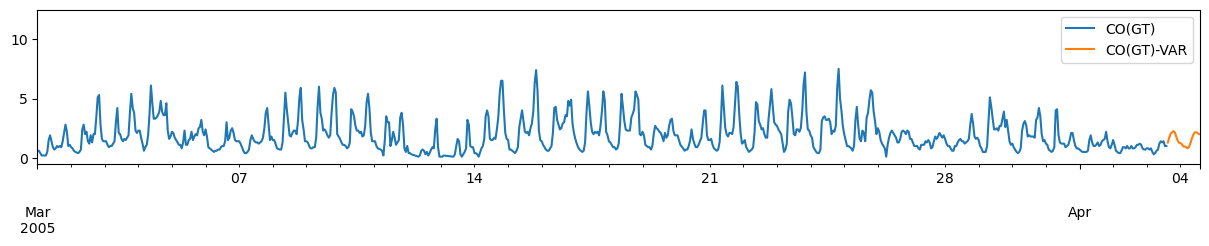

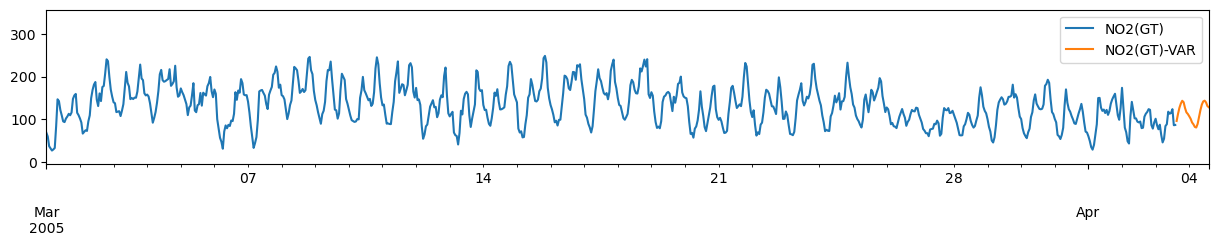

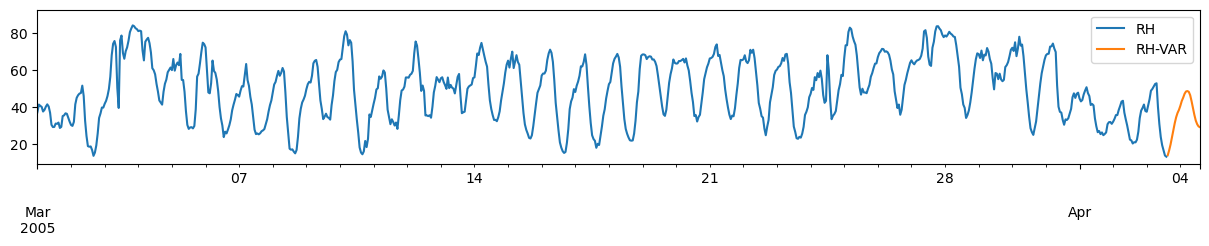

In [15]:
forecast_var = pd.DataFrame(var_model.forecast(train_df.values, 
                                              steps=forecast_length), 
                           columns=train_df.columns, 
                           index=test_df.index)
forecast_var = forecast_var.rename(columns={c: c+'-VAR' for c in forecast_var.columns})
for c in train_df.columns:
    fig, ax = plt.subplots(figsize=[15, 2])
    pd.concat([train_df[[c]], forecast_var[[c+'-VAR']]], axis=1).plot(ax=ax)
    plt.xlim(left=pd.to_datetime('2005-03-01'))
    plt.xlabel('')
#     plt.tight_layout()
    plt.show()